<a href="https://colab.research.google.com/github/Apoorv-Krishn-DAS/Apoorv-Krishn-DAS/blob/main/Plant_Leaf_Disease_Detection_Using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plant Leaf Disease Detection Using Deep Learning**

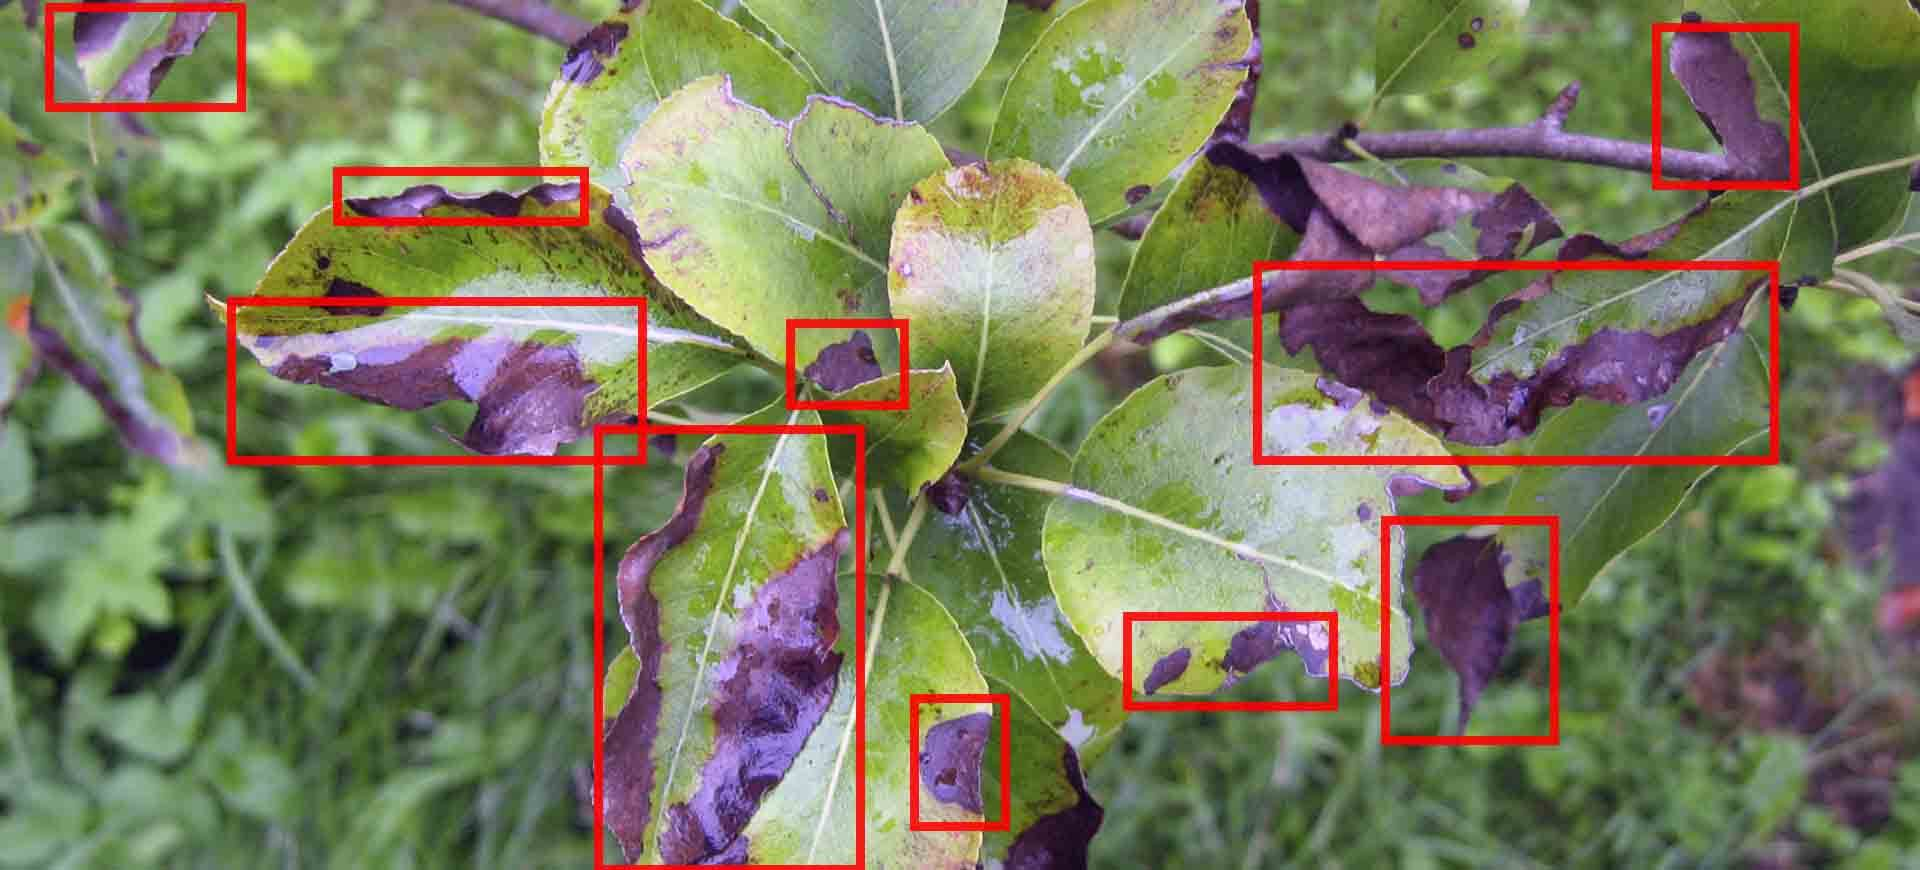

In [ ]:
!pip install tensorflow
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
!pip install opendatasets
import opendatasets as od

In [ ]:
import os

print('Training Folder')
for dirpath,filename,dirname in os.walk(r'E:\MINICONDA_FILES\PROJECT3\new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train'):
    print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')

Training Folder
There are 34 directories,0 images in E:\MINICONDA_FILES\PROJECT3\new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train
There are 0 directories,2016 images in E:\MINICONDA_FILES\PROJECT3\new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Apple___Apple_scab
There are 0 directories,1987 images in E:\MINICONDA_FILES\PROJECT3\new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Apple___Black_rot
There are 0 directories,1760 images in E:\MINICONDA_FILES\PROJECT3\new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Apple___Cedar_apple_rust
There are 0 directories,2008 images in E:\MINICONDA_FILES\PROJECT3\new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Apple___healthy
There are 0 directories,1816

In [ ]:
print('Testing Folder')
for dirpath,filename,dirname in os.walk(r'E:\MINICONDA_FILES\PROJECT3\new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid'):
    print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')

Testing Folder
There are 27 directories,0 images in E:\MINICONDA_FILES\PROJECT3\new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid
There are 0 directories,504 images in E:\MINICONDA_FILES\PROJECT3\new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Apple___Apple_scab
There are 0 directories,497 images in E:\MINICONDA_FILES\PROJECT3\new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Apple___Black_rot
There are 0 directories,440 images in E:\MINICONDA_FILES\PROJECT3\new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Apple___Cedar_apple_rust
There are 0 directories,502 images in E:\MINICONDA_FILES\PROJECT3\new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Apple___healthy
There are 0 directories,454 image

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = 'E:/MINICONDA_FILES/PROJECT3/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
test_dir = 'E:/MINICONDA_FILES/PROJECT3/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

train_data = image_dataset_from_directory(train_dir,
                                             image_size=(224,224),
                                             label_mode='categorical',
                                             batch_size=32)

test_data = image_dataset_from_directory(test_dir,
                                         image_size=(224,224),
                                         label_mode='categorical',
                                         batch_size=32)

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [ ]:
train_data,test_data

(<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>)

In [ ]:
class_names = train_data.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def get_random_image(directory,class_names=class_names):
    rn = random.randint(0,len(class_names)-1)
    choice = random.choice(os.listdir(os.path.join(directory,class_names[rn])))
    img_path= os.path.join(directory,class_names[rn],choice)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    fontsize=10
    plt.title(class_names[rn],fontdict={'fontsize': fontsize})
    plt.axis(False)

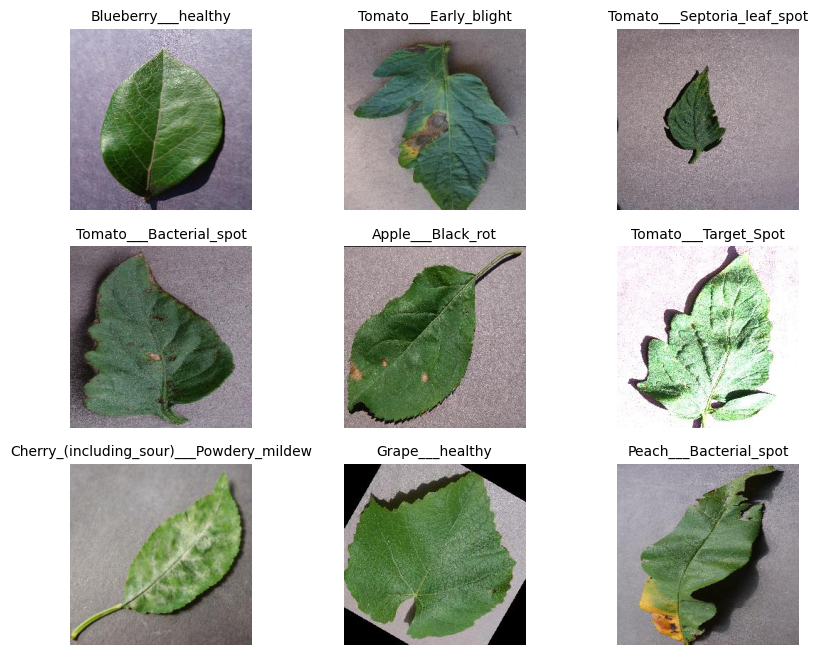

In [ ]:
plt.figure(figsize=(10,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    get_random_image(train_dir)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

image_shape = (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False,)
base_model.trainable = False

inputs =  layers.Input(shape = image_shape,name='input_layer')

x = base_model(inputs)

x = layers.GlobalAveragePooling2D(name='GlobalAveragePooling2D_layer')(x)

outputs = layers.Dense(38,activation='softmax',name='output_layer')(x)

feature_model = tf.keras.Model(inputs,outputs,name='plant_disease_model')

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False

feature_model.compile(loss='categorical_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

In [ ]:

base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_2 (Rescaling)        (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_1 (Normalization  (None, None, None,   7          ['rescaling_2[0][0]']            
 )                              3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 1,350,960
Non-trainable params: 2,698,611
__________________________________________________________________________________________________


In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir=log_dir
    )
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)

checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only=True,
                                                      save_best_only=True,
                                                      monitor="val_loss")

In [ ]:
initial_epochs = 50

history1 = feature_model.fit(train_data,epochs=initial_epochs,
                  steps_per_epoch=len(train_data),
                  validation_data=test_data,
                  validation_steps=len(test_data),
                  callbacks=[early_stopping,
                             model_checkpoint,
                             reduce_lr,
                             create_tensorboard_callback('plant_disease_model',
                                                         'EfficientNetB010')])

Saving TensorBoard log files to: plant_disease_model/EfficientNetB010/20230420-002259
Epoch 1/50
2197/2197 [==============================] - 2032s 925ms/step - loss: 0.0262 - accuracy: 0.9915 - val_loss: 0.0486 - val_accuracy: 0.9858 - lr: 0.0010
Epoch 2/50
2197/2197 [==============================] - 1926s 877ms/step - loss: 0.0201 - accuracy: 0.9932 - val_loss: 0.0337 - val_accuracy: 0.9894 - lr: 0.0010
Epoch 3/50
2197/2197 [==============================] - 1917s 873ms/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 0.0222 - val_accuracy: 0.9937 - lr: 0.0010
Epoch 4/50
2197/2197 [==============================] - 1915s 872ms/step - loss: 0.0152 - accuracy: 0.9951 - val_loss: 0.0295 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 5/50
2197/2197 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9955
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
2197/2197 [==============================] - 1924s 876ms/step - loss: 0.0135 - accuracy: 0.

In [ ]:
feature_model.load_weights(checkpoint_path)

In [ ]:
feature_model.evaluate(test_data)

550/550 [==============================] - 344s 620ms/step - loss: 0.0073 - accuracy: 0.9984


[0.007274392060935497, 0.9984065294265747]

In [ ]:
def load_prep(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img)

    img = tf.image.resize(img,size=(224,224))

    return img

Text(0.5, 0.98, '(224, 224, 3)')

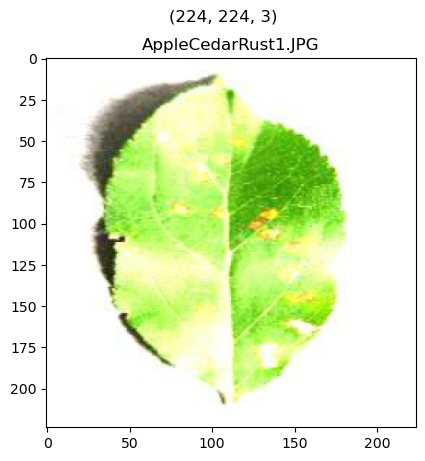

In [ ]:
image = load_prep(r'E:\MINICONDA_FILES\PROJECT3\new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\test\test\AppleCedarRust1.JPG')
plt.imshow(image/255.)
plt.title('AppleCedarRust1.JPG')
plt.suptitle(image.shape)

In [ ]:
pred = feature_model.predict(tf.expand_dims(image,axis=0))
pred

1/1 [==============================] - 1s 1s/step


array([[2.8146506e-18, 5.8862948e-19, 1.0000000e+00, 4.1395038e-34,
        2.1517241e-23, 3.2229669e-32, 2.1334065e-32, 5.2606758e-22,
        1.0763121e-21, 0.0000000e+00, 1.4734510e-38, 1.9950224e-29,
        4.2448107e-31, 1.3996006e-27, 1.2440141e-27, 1.4234787e-30,
        3.6722141e-26, 1.0077134e-28, 2.8983498e-35, 1.7651298e-33,
        4.5817430e-30, 8.9002956e-38, 5.5475660e-31, 2.2018335e-32,
        4.0321307e-37, 5.5389388e-31, 5.9936374e-31, 4.5195625e-30,
        1.6416403e-32, 1.7834741e-31, 4.5583820e-30, 4.0279935e-38,
        0.0000000e+00, 0.0000000e+00, 6.3605510e-26, 5.7944998e-36,
        2.1494029e-30, 4.6401648e-34]], dtype=float32)

In [ ]:
predicted_value = class_names[pred.argmax()]
predicted_value

'Apple___Cedar_apple_rust'

In [ ]:
def random_image_predict(model,test_dir=test_dir,class_names=class_names,rand_class=True,cls_name=None):
  if rand_class==True:
    ran_cls = random.randint(0,len(class_names))
    cls = class_names[ran_cls]
    ran_path = test_dir +'/'+ cls+ '/'+ random.choice(os.listdir(test_dir+'/'+cls))
  else:
    cls = class_names[cls_name]
    ran_path = test_dir +'/'+ cls + '/'+ random.choice(os.listdir(test_dir+'/'+cls))

  prep_img = load_prep(ran_path)

  pred = model.predict(tf.expand_dims(prep_img,axis=0))
  pred_cls = class_names[pred[0].argmax()]
  pred_percent = pred[0][pred[0].argmax()]*100
  plt.imshow(prep_img/255.)
  if pred_cls == cls:
    c = 'g'
  else:
    c = 'r'
  plt.title(f'actual:{cls},\npred:{pred_cls},\nprob:{pred_percent:.2f}%',color = c ,fontdict={'fontsize':10})
  plt.axis(False)

1/1 [==============================] - 0s 42ms/step


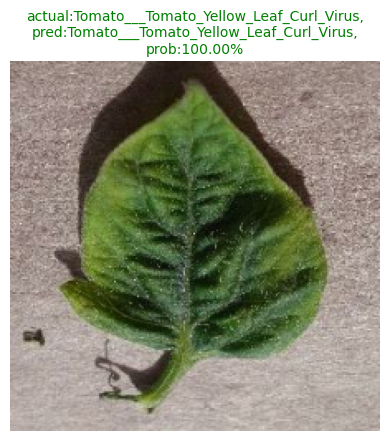

In [ ]:
random_image_predict(feature_model)

1/1 [==============================] - 0s 40ms/step


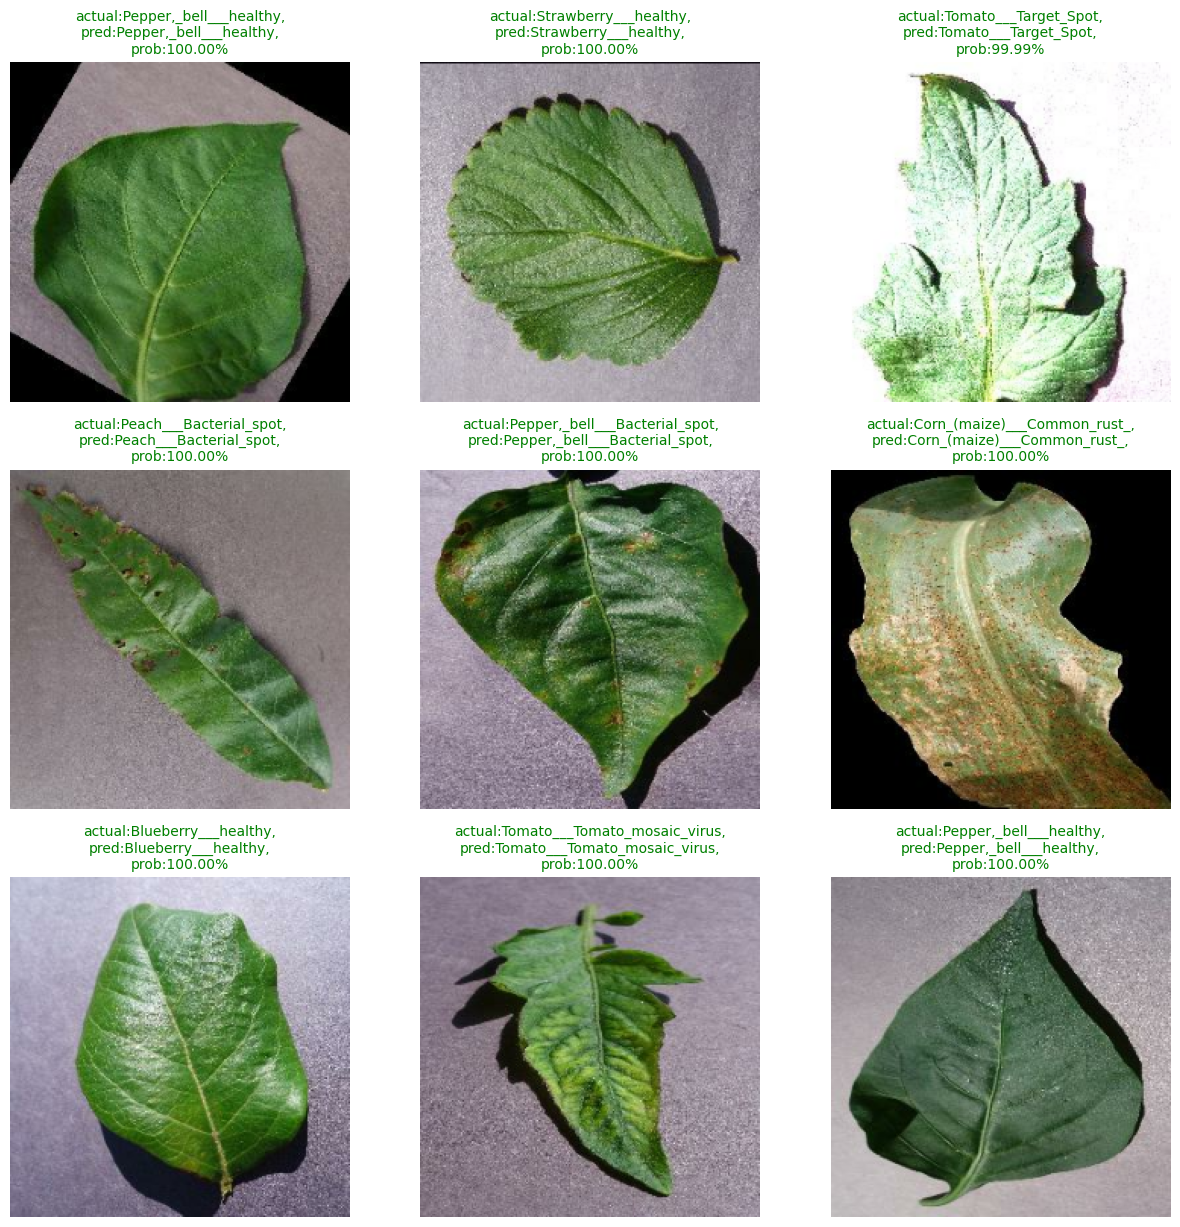

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)
  random_image_predict(feature_model,test_dir)

1/1 [==============================] - 0s 47ms/step


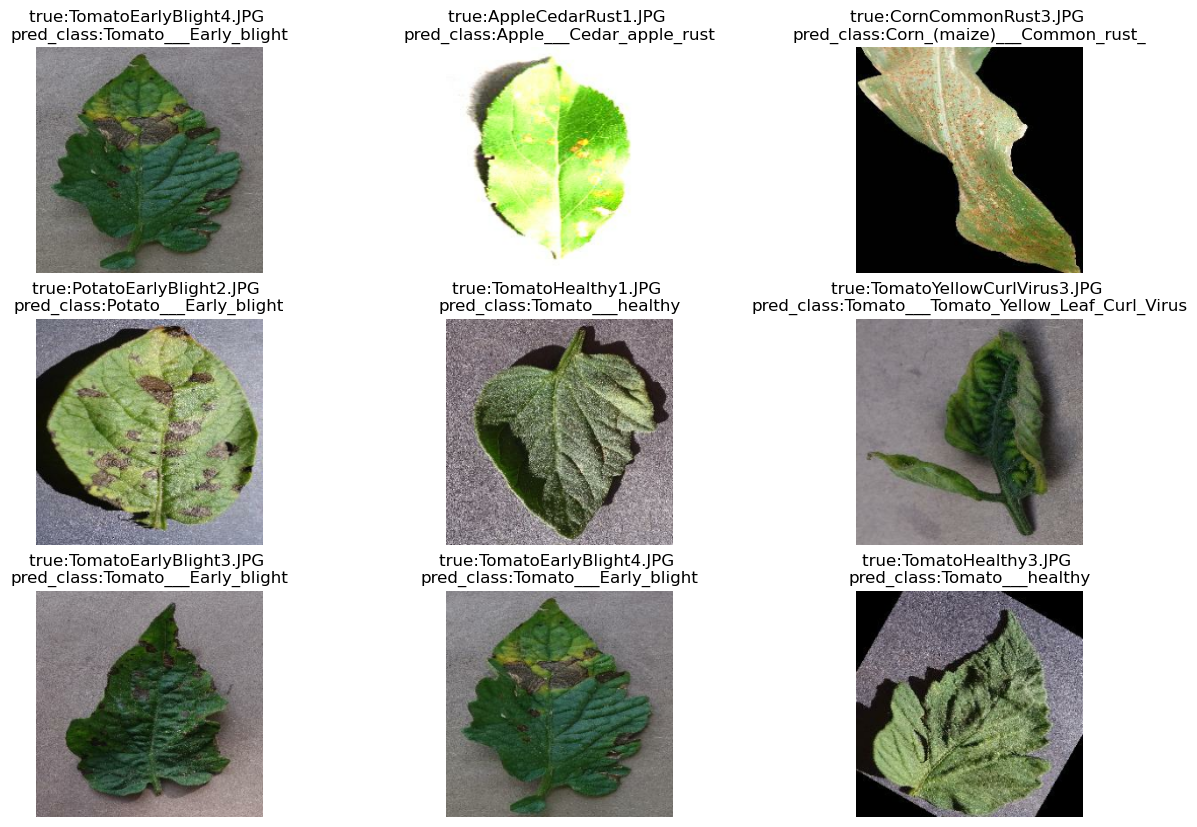

In [ ]:
data_dir=r'E:\MINICONDA_FILES\PROJECT3\new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\test\test'
plt.figure(figsize=(15,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  rn = random.choice(os.listdir(data_dir))
  image_path=os.path.join(data_dir,rn)
  img = load_prep(image_path)
  pred = feature_model.predict(tf.expand_dims(img,axis=0))
  pred_name = class_names[pred.argmax()]
  plt.imshow(img/255.)
  plt.title(f'true:{rn} \npred_class:{pred_name}')
  plt.axis(False)

# This is how we can predict plant disease in various plant species by using CNN

## Thank you